The project report should contain (not necessarily in this order):

1. Description of the data (briefly describe each column in the data source).
2. Your code used for the analysis (for instance .R file with comments describing your analysis)
3. At least two graphs describing the data.
4. Numerical, and/or tabular, and/or graphical results of the analysis. At least one model needs
to be built here (regression and/or ANOVA models).
5. Briefly explain your choice: why have you selected such a model? If there is a justification for
a better model, build that model as well.
6. Assess the models’ accuracy.
7. Check the models’ assumptions as appropriate (e.g. normality of residuals).
8. Discussion of the results. For instance, which of the predictors are significant and was that
expected from the data visualization (point 3). Also, please interpret the estimated model
coefficients (those that are statistically significant).

All the graphs need to have appropriate labels and tick labels of appropriate font size. Similarly for
the tables, the font needs to be appropriate as well as the column captions. Please name you tables
and graphs.

The data set describes a test-to-failure experiment. Each data set consists of individual files that are 1-second vibration signal snapshots recorded at specific intervals. Each file consists of 20,480 points with the sampling rate set at 20 kHz.

```Recording Duration:         October 22, 2003 12:06:24 to November 25, 2003 23:39:56
No. of Files:               2,156
No. of Channels:            8
Channel Arrangement:        Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4;
                            Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8.
File Recording Interval:    Every 10 minutes (except the first 43 files were taken every 5 minutes)
File Format:                ASCII
Description:                At the end of the test-to-failure experiment, inner race defect occurred in
                            bearing 3 and roller element defect in bearing 4.

In [1]:
import pandas as pd
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


path = "../data/IMS/1st_test/"


filenames = []

for (root, _, files) in os.walk(path):
    for file in files:
        if "2003" in file:
            filenames.append(os.path.join(root,file)) 

filenames.sort()

# initialize empty dataframe





In [2]:
i = 0

column_names = [f"Bearing 1 - Ch 1", f"Bearing 1 - Ch 2",
                f"Bearing 2 - Ch 1", f"Bearing 2 - Ch 2",
                f"Bearing 3 - Ch 1", f"Bearing 3 - Ch 2",
                f"Bearing 4 - Ch 1", f"Bearing 4 - Ch 2"]

df = pd.DataFrame(columns=column_names)



for file in filenames:
    print(f"parsing file {i} of {len(filenames)}")
    df_temp = pd.read_csv(file, sep="\t" , skiprows=lambda i: i > 0 and random.random() > 0.1)

    df_temp.columns = column_names
    df = pd.concat([df, df_temp], ignore_index=True)
    i = i + 1

    

    


parsing file 0 of 2156
parsing file 1 of 2156
parsing file 2 of 2156
parsing file 3 of 2156
parsing file 4 of 2156
parsing file 5 of 2156
parsing file 6 of 2156
parsing file 7 of 2156


/tmp/ipykernel_24546/2358149772.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)


parsing file 8 of 2156
parsing file 9 of 2156
parsing file 10 of 2156
parsing file 11 of 2156
parsing file 12 of 2156
parsing file 13 of 2156
parsing file 14 of 2156
parsing file 15 of 2156
parsing file 16 of 2156
parsing file 17 of 2156
parsing file 18 of 2156
parsing file 19 of 2156
parsing file 20 of 2156
parsing file 21 of 2156
parsing file 22 of 2156
parsing file 23 of 2156
parsing file 24 of 2156
parsing file 25 of 2156
parsing file 26 of 2156
parsing file 27 of 2156
parsing file 28 of 2156
parsing file 29 of 2156
parsing file 30 of 2156
parsing file 31 of 2156
parsing file 32 of 2156
parsing file 33 of 2156
parsing file 34 of 2156
parsing file 35 of 2156
parsing file 36 of 2156
parsing file 37 of 2156
parsing file 38 of 2156
parsing file 39 of 2156
parsing file 40 of 2156
parsing file 41 of 2156
parsing file 42 of 2156
parsing file 43 of 2156
parsing file 44 of 2156
parsing file 45 of 2156
parsing file 46 of 2156
parsing file 47 of 2156
parsing file 48 of 2156
parsing file 49 of

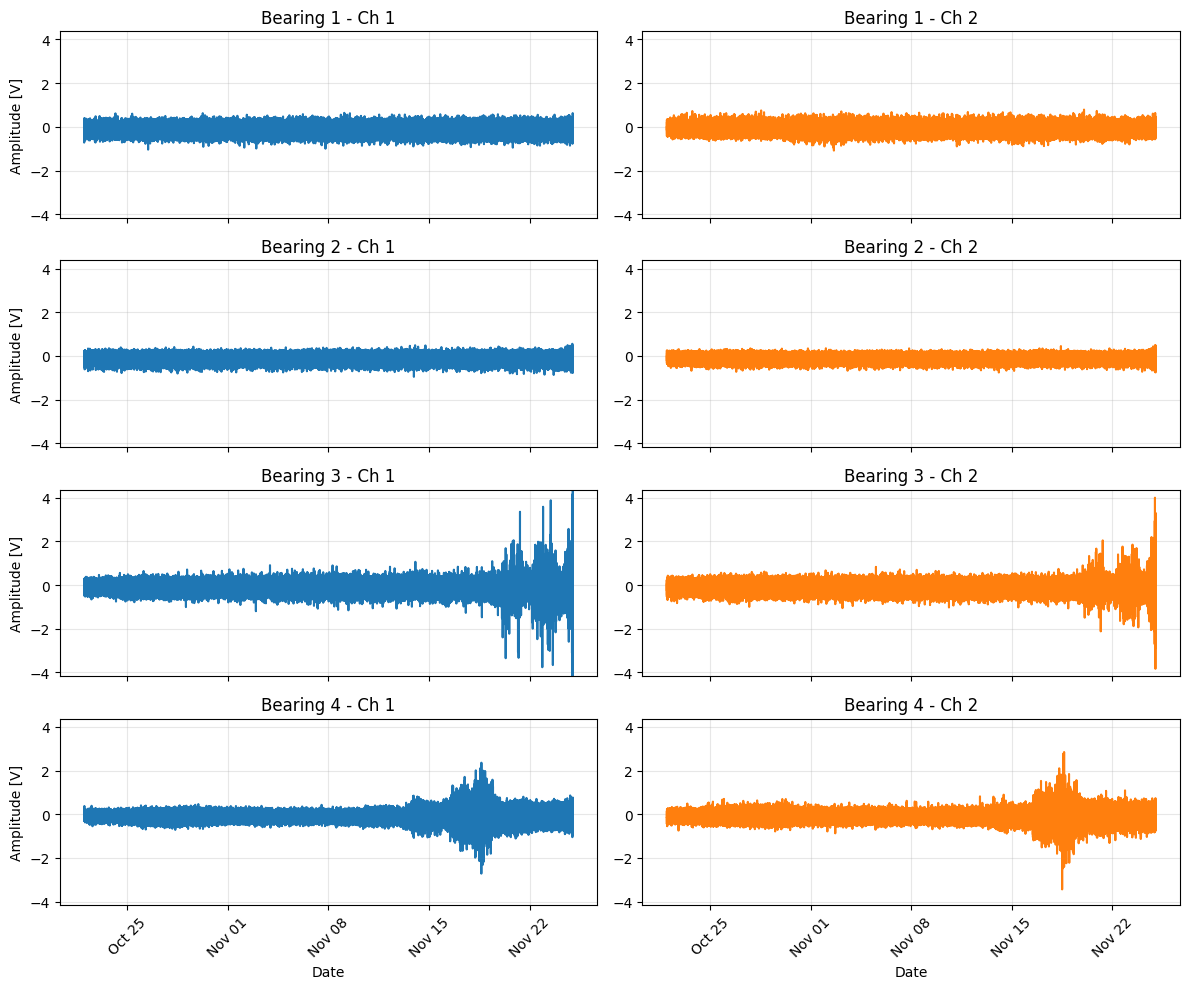

In [3]:


fig, axes = plt.subplots(4, 2, figsize=(12, 10), sharex=True)
axes = axes.ravel()  # flatten to easy 1D indexing

n_samples = len(df)
start = pd.Timestamp("2022-10-22")
end = pd.Timestamp("2022-11-25")

# Generate timestamps
time = pd.date_range(start, end, periods=n_samples)

y_min = df.min().min()
y_max = df.max().max()

for ax in axes:
    ax.set_ylim(y_min, y_max)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
    ax.tick_params(axis='x', rotation=45)

for ax in axes[-2:]:  # last row
    ax.set_xlabel("Date")
for ax in axes[::2]:  # left column
    ax.set_ylabel("Amplitude [V]")
    

# Loop through each bearing (1–4)
for i in range(4):
    ch1_col = f"Bearing {i+1} - Ch 1"
    ch2_col = f"Bearing {i+1} - Ch 2"

    axes[2*i].plot(time, df[ch1_col], color="tab:blue")
    axes[2*i].set_title(ch1_col)
    axes[2*i].grid(True, alpha=0.3)

    axes[2*i + 1].plot(time, df[ch2_col], color="tab:orange")
    axes[2*i + 1].set_title(ch2_col)
    axes[2*i + 1].grid(True, alpha=0.3)

plt.tight_layout()

The data is a time-series, the project will use regressive models to predict anomalies. The model will be trained on bearing 1 and 2, and validated on 3 and 4.

In [4]:


data_channels = ["Mean Bearing 1 - Ch 1", "Mean Bearing 1 - Ch 2",
                 "Mean Bearing 2 - Ch 1", "Mean Bearing 2 - Ch 2",
                 "Mean Bearing 3 - Ch 1", "Mean Bearing 3 - Ch 2",
                 "Mean Bearing 4 - Ch 1", "Mean Bearing 4 - Ch 2"]

Magnitude = ["Magnitude Bearing 1", 
             "Magnitude Bearing 2", 
             "Magnitude Bearing 3", 
             "Magnitude Bearing 4"]


df = pd.DataFrame()

chunk_size = 10

for file in filenames:
    df_temp = pd.read_csv(file, sep="\t", names=data_channels)
    
    df_temp['subchunk'] = df_temp.index // chunk_size
    df_mag = pd.DataFrame()

    # Compute magnitude per bearing
    for i in range(len(Magnitude)):
        mag = np.sqrt(df_temp[data_channels[2*i]]**2 + df_temp[data_channels[2*i + 1]]**2)
        mag_mean = mag.groupby(df_temp['subchunk']).mean().reset_index(drop=True)
        df_mag[Magnitude[i]] = mag_mean

    # Append this file's computed magnitudes
    df = pd.concat([df, df_mag], ignore_index=True)

# df.to_csv("mean values of data", mode="a", header=False, index=False) 

In [5]:
# df = df.apply(pd.Series.explode).reset_index(drop=True)

df.head()

,Magnitude Bearing 1,Magnitude Bearing 2,Magnitude Bearing 3,Magnitude Bearing 4
0,0.176780,0.239648,0.134719,0.160630
1,0.126014,0.093179,0.202491,0.153158
2,0.158934,0.195772,0.119946,0.149180
3,0.125843,0.066309,0.137423,0.200081
4,0.172309,0.232305,0.137444,0.151784


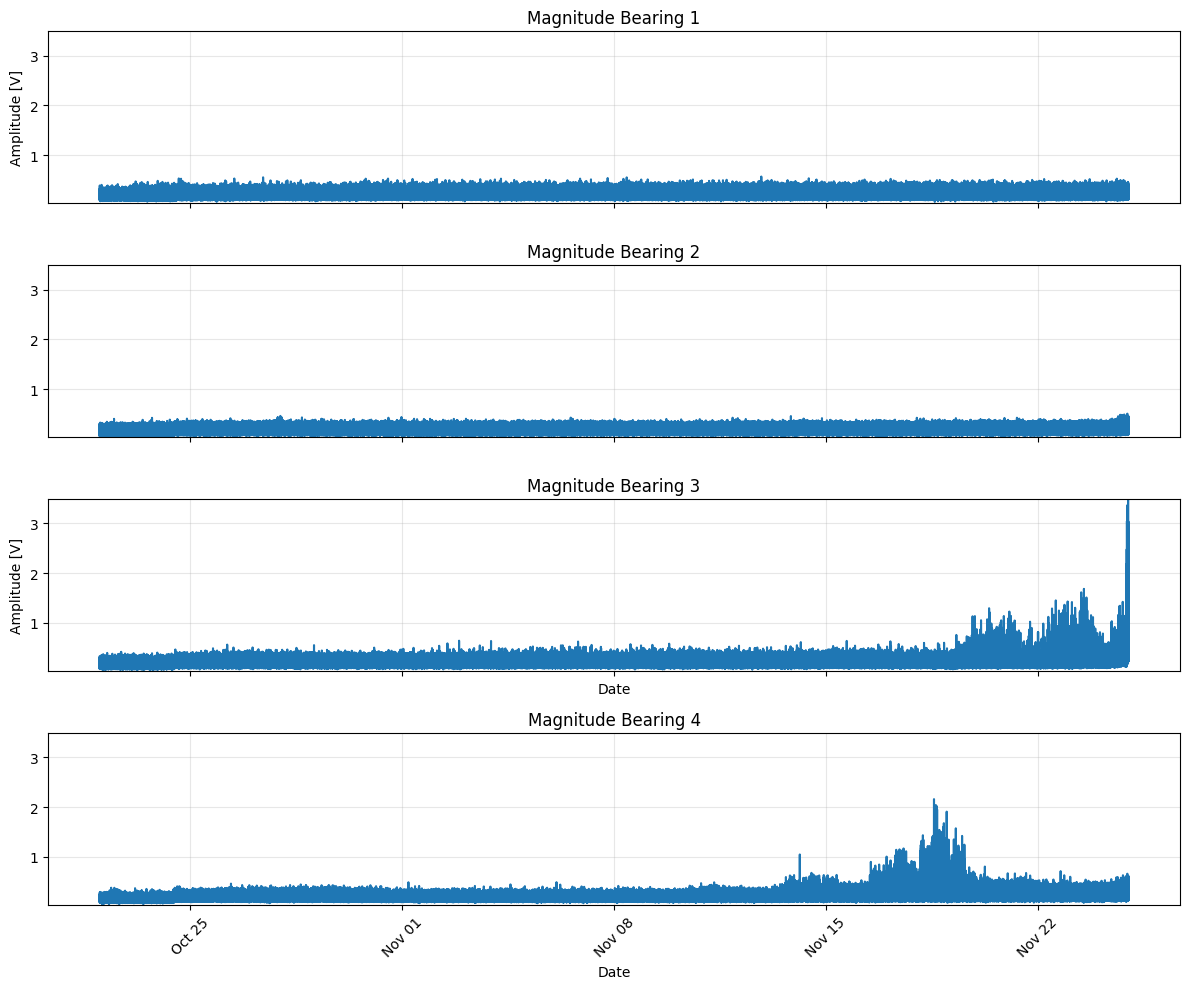

In [6]:
fig, axes = plt.subplots(4, figsize=(12, 10), sharex=True)
axes = axes.ravel()  # flatten to easy 1D indexing

n_samples = len(df)
start = pd.Timestamp("2022-10-22")
end = pd.Timestamp("2022-11-25")

# Generate timestamps
time = pd.date_range(start, end, periods=n_samples)

y_min = df.min().min()
y_max = df.max().max()

for ax in axes:
    ax.set_ylim(y_min, y_max)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
    ax.tick_params(axis='x', rotation=45)

for ax in axes[-2:]:  # last row
    ax.set_xlabel("Date")
for ax in axes[::2]:  # left column
    ax.set_ylabel("Amplitude [V]")
    

# Loop through each bearing (1–4)
for i in range(4):
    ch1_col = f"Magnitude Bearing {i+1}"

    axes[i].plot(time, df[ch1_col], color="tab:blue")
    axes[i].set_title(ch1_col)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()


In [7]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(df)
# df = pd.DataFrame(X_scaled, columns=Magnitude)

df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
"""
from sklearn.model_selection import TimeSeriesSplit


tscv = TimeSeriesSplit(n_splits=3)

for train_index, test_index in tscv.split(df):
    X_train, X_test = df.iloc[train_index], df.iloc[test_index]

plt.plot(df.index, df["Magnitude Bearing 1"], label="Full Data")
plt.plot(X_test.index, X_test["Magnitude Bearing 1"], label="Test Split")
"""

'\nfrom sklearn.model_selection import TimeSeriesSplit\n\n\ntscv = TimeSeriesSplit(n_splits=3)\n\nfor train_index, test_index in tscv.split(df):\n    X_train, X_test = df.iloc[train_index], df.iloc[test_index]\n\nplt.plot(df.index, df["Magnitude Bearing 1"], label="Full Data")\nplt.plot(X_test.index, X_test["Magnitude Bearing 1"], label="Test Split")\n'

In [9]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Code based on: https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/


df_pred = pd.DataFrame()

train = df["Magnitude Bearing 1"]
window = 10
model = AutoReg(train, lags=window)
model_fit = model.fit()
coef = model_fit.params


for i in range(len(Magnitude)):
    
    
    test = df[f"Magnitude Bearing {i + 1}"]


    history = train.values[-window:].tolist() 
    predictions = []

    for t in range(len(test)):
        lag = history[-window:]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
        obs = test.iloc[t]  
        predictions.append(yhat)
        history.append(obs)


    df_pred[f"Predictions bearing {i + 1}"] = predictions
    df_pred[f"Error bearing {i + 1}"] = np.abs(test.values - predictions)
    df_pred[f"Error rms {i+1}"] = np.sqrt(pd.Series((test.values - predictions)**2).rolling(window=50).mean())

    df_pred[f"Actual {i + 1}"] = test.values
    # rmse = np.sqrt(mean_squared_error(test, predictions))
    # print(f'Test RMSE: {rmse:.3f}')

    


/tmp/ipykernel_24546/1975922080.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = coef[0]
/tmp/ipykernel_24546/1975922080.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat += coef[d+1] * lag[window-d-1]
/tmp/ipykernel_24546/1975922080.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  yhat = coef[0]
/tmp/ipykernel_24546/1975922080.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. 

In [12]:
df_pred.to_csv("Predictions", mode="a", header=True, index=False) 

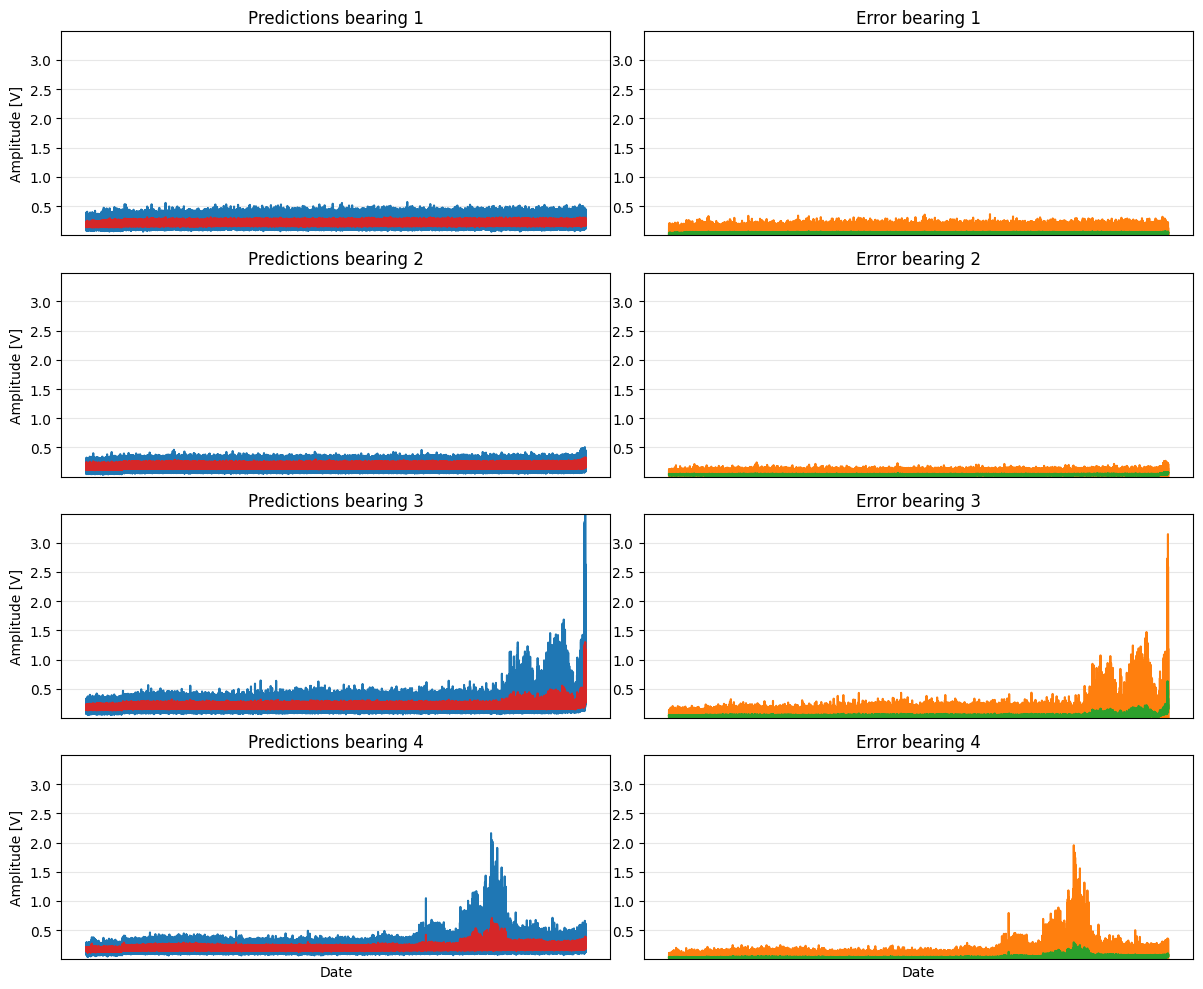

In [ ]:


# Create two subplots side-by-side
fig, axes = plt.subplots(4, 2, figsize=(12, 10), sharex=True)

axes = axes.ravel()  # flatten to easy 1D indexing

n_samples = len(df_pred)
start = pd.Timestamp("2022-10-22")
end = pd.Timestamp("2022-11-25")


# Generate timestamps
time = pd.date_range(start, end, periods=n_samples)

y_min = df_pred.min().min()
y_max = df_pred.max().max()

for ax in axes:
    ax.set_ylim(y_min, y_max)
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
    ax.tick_params(axis='x', rotation=45)

for ax in axes[-2:]:  # last row
    ax.set_xlabel("Date")
for ax in axes[::2]:  # left column
    ax.set_ylabel("Amplitude [V]")
    

# plt.plot(df.index, df["Magnitude Bearing 3"], label="Full Data")
# plt.plot(X_test.index, X_test["Magnitude Bearing 3"], label="Test Split")


# Loop through each bearing (1–4)
for i in range(4):
    ch1_col = f"Predictions bearing {i+1}"
    ch1_actual = f"Actual {i+1}"
    ch2_col = f"Error bearing {i+1}"
    ch2_rms = f"Error rms {i+1}"
    

    
    axes[2*i].plot(test.index, df_pred[ch1_actual], color="tab:blue")
    axes[2*i].plot(test.index, df_pred[ch1_col], color="tab:red")
    
    axes[2*i].set_title(ch1_col)
    axes[2*i].grid(True, alpha=0.3)

    axes[2*i + 1].plot(test.index, df_pred[ch2_col], color="tab:orange")
    axes[2*i + 1].plot(test.index, df_pred[ch2_rms], color="tab:green")
    axes[2*i + 1].set_title(ch2_col)
    axes[2*i + 1].grid(True, alpha=0.3)

plt.tight_layout()